In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [8]:
df=pd.read_csv('C:/Users/JHON WICK/OneDrive/Desktop/dt.csv')

In [9]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Hour of day
0,New York,Car,Sunny,Stable,Monday,8,60,True,False,50,Medium,8 AM
1,New York,Car,Sunny,Stable,Monday,12,55,True,False,48,High,12 PM
2,New York,Bus,Rainy,Stable,Tuesday,16,40,False,False,60,High,4 PM
3,Los Angeles,Car,Cloudy,Stable,Wednesday,10,65,False,False,45,Low,10 AM
4,Los Angeles,Car,Sunny,Stable,Thursday,18,50,True,True,55,Medium,6 PM


In [10]:
df.drop(["Hour Of Day"], axis=1)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Hour of day
0,New York,Car,Sunny,Stable,Monday,60,True,False,50,Medium,8 AM
1,New York,Car,Sunny,Stable,Monday,55,True,False,48,High,12 PM
2,New York,Bus,Rainy,Stable,Tuesday,40,False,False,60,High,4 PM
3,Los Angeles,Car,Cloudy,Stable,Wednesday,65,False,False,45,Low,10 AM
4,Los Angeles,Car,Sunny,Stable,Thursday,50,True,True,55,Medium,6 PM
5,Los Angeles,Truck,Rainy,Declining,Friday,35,False,False,70,High,2 PM
6,Chicago,Car,Snowy,Stable,Saturday,45,False,False,42,Medium,9 AM
7,Chicago,Car,Sunny,Growing,Sunday,55,True,False,47,Low,1 PM
8,Chicago,Bus,Cloudy,Growing,Monday,30,True,False,65,High,5 PM
9,New York,Car,Sunny,Stable,Monday,58,True,False,52,Medium,8 AM


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   City                   36 non-null     object
 1   Vehicle Type           36 non-null     object
 2   Weather                36 non-null     object
 3   Economic Condition     36 non-null     object
 4   Day Of Week            36 non-null     object
 5   Hour Of Day            36 non-null     int64 
 6   Speed                  36 non-null     int64 
 7   Is Peak Hour           36 non-null     bool  
 8   Random Event Occurred  36 non-null     bool  
 9   Energy Consumption     36 non-null     int64 
 10  Traffic Density        36 non-null     object
 11  Hour of day            36 non-null     object
dtypes: bool(2), int64(3), object(7)
memory usage: 3.0+ KB


# traffic pattern analysis

C:\Users\JHON WICK\AppData\Local\Temp\ipykernel_189928\1302150516.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(traffic_pattern.pivot('Day Of Week', 'Hour of day', 'Speed'), cmap='YlGnBu')


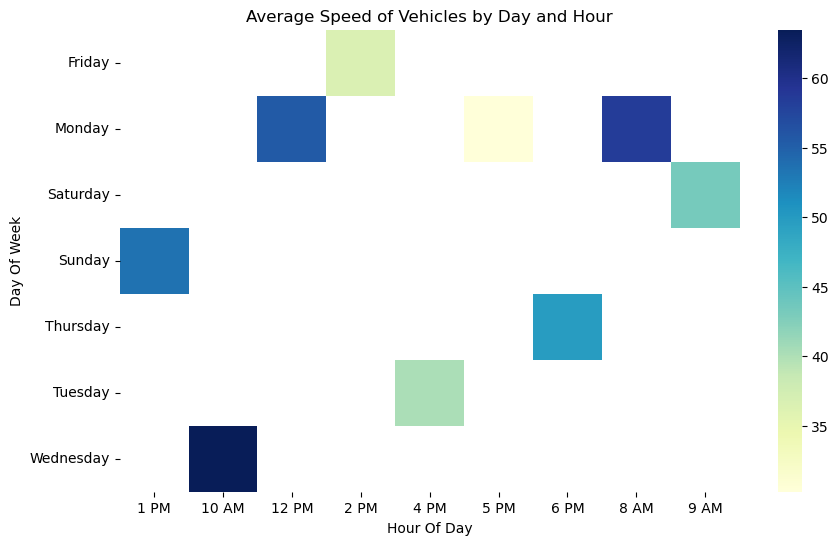

In [13]:
traffic_pattern = df.groupby(['Day Of Week', 'Hour of day'])['Speed'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_pattern.pivot('Day Of Week', 'Hour of day', 'Speed'), cmap='YlGnBu')
plt.title('Average Speed of Vehicles by Day and Hour')
plt.xlabel('Hour Of Day')
plt.ylabel('Day Of Week')
plt.show()

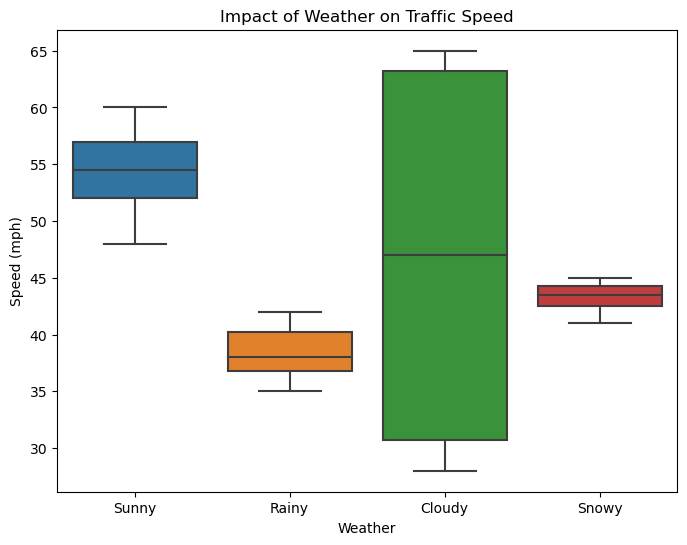

In [15]:
#impact of weather on traffic
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather', y='Speed', data=df)
plt.title('Impact of Weather on Traffic Speed')
plt.xlabel('Weather')
plt.ylabel('Speed (mph)')
plt.show()

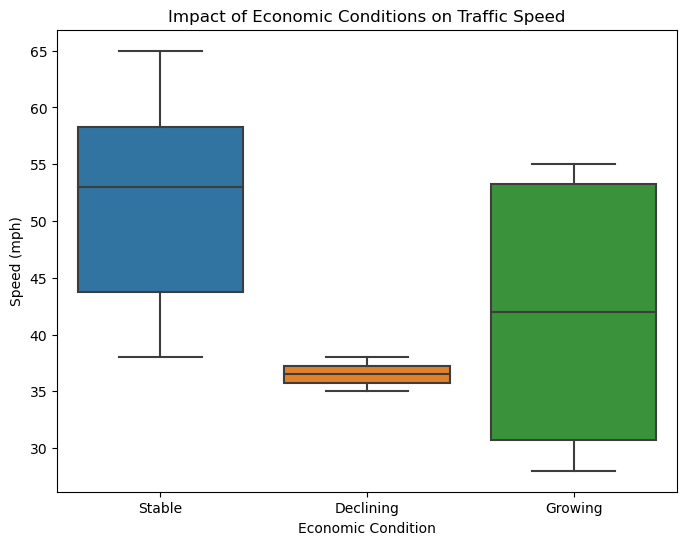

In [16]:
#Impact of Economic conditions on Traffic
plt.figure(figsize=(8, 6))
sns.boxplot(x='Economic Condition', y='Speed', data=df)
plt.title('Impact of Economic Conditions on Traffic Speed')
plt.xlabel('Economic Condition')
plt.ylabel('Speed (mph)')
plt.show()

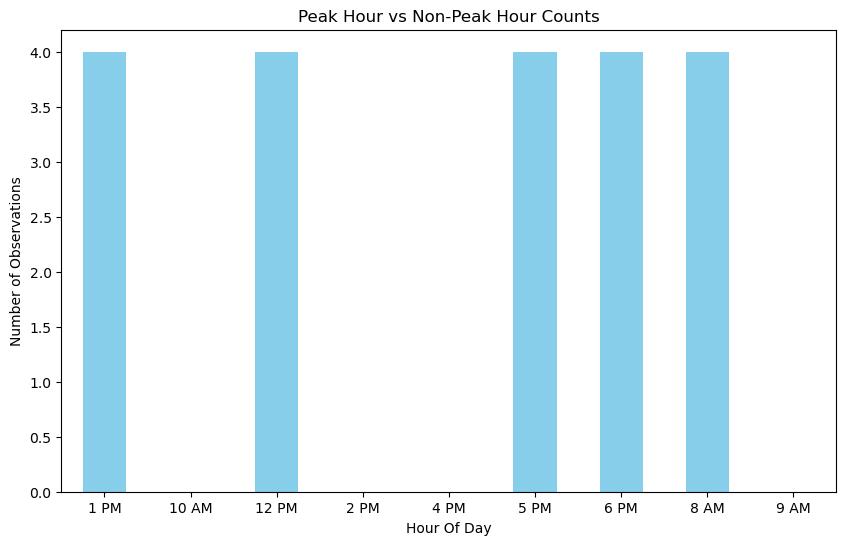

In [17]:
# Peak Hour Analysis
peak_hour_counts = df.groupby('Hour of day')['Is Peak Hour'].sum()
plt.figure(figsize=(10, 6))
peak_hour_counts.plot(kind='bar', color='skyblue')
plt.title('Peak Hour vs Non-Peak Hour Counts')
plt.xlabel('Hour Of Day')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()


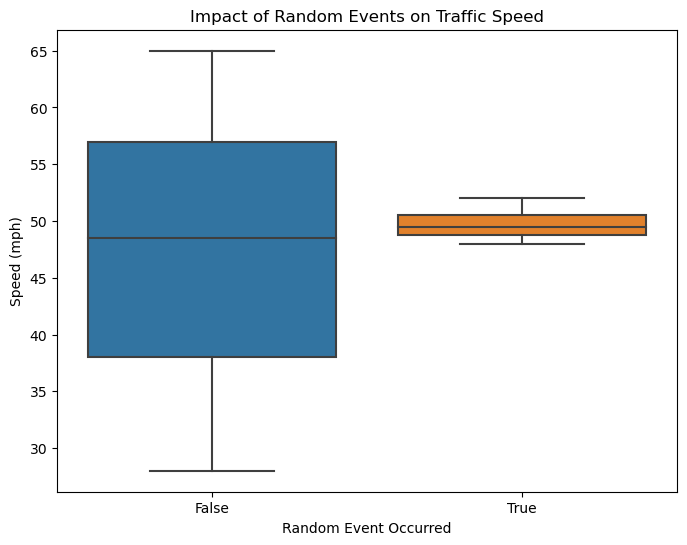

In [20]:
# Random Event Impact Assessment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Random Event Occurred', y='Speed', data=df)
plt.title('Impact of Random Events on Traffic Speed')
plt.xlabel('Random Event Occurred')
plt.ylabel('Speed (mph)')
plt.show()

C:\Users\JHON WICK\AppData\Local\Temp\ipykernel_189928\2942688218.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle Type', y='Energy Consumption', data=df, ci=None)


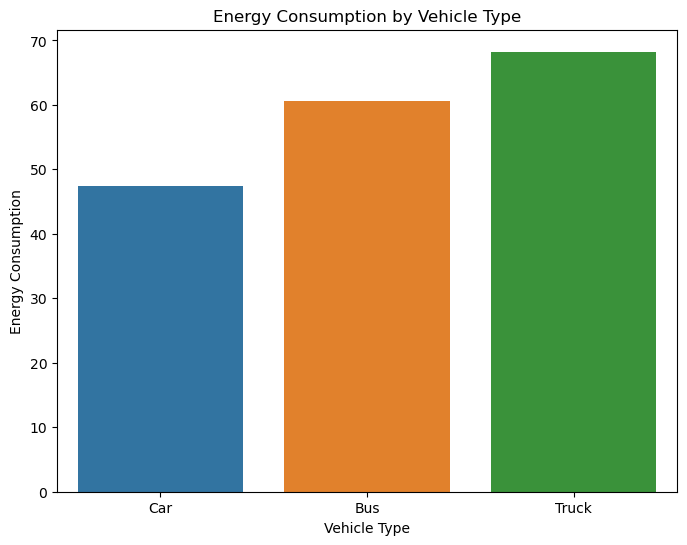

In [19]:
# Energy Consumption Trends
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle Type', y='Energy Consumption', data=df, ci=None)
plt.title('Energy Consumption by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Energy Consumption')
plt.show()